In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

## Add the data (and replace covid's year data)

In [12]:
# Data from the provided image
data = {
    'Year': [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020],
    'Passengers': [93554600, 112309600, 157891000, 193536844.1, 288449342, 359471494, 483874507.2, 588104162, 800581685.8],
    'GDP': [22935.8, 24257.93, 28464.67, 30481.52, 32703.95, 35416.87, 36754.22, 38438.1, 39491.19], #changed
    'Population': [404720921, 411661890, 417909204, 423509502, 426165414, 431954554, 439401634, 442519104, 445390196] 
}

df = pd.DataFrame(data)
#print (df)

X = df[['GDP', 'Population']]
y = df['Passengers']

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Linear Regression model
model = LinearRegression()
model.fit(X_poly, y)

#Testing with data 
new_data = np.array([[15459.50, 420308868]])  #testing the data for year 1990
new_data_poly = poly.transform(new_data)

# Predicting the price
predicted_price = model.predict(new_data_poly)
print(predicted_price)

[3.36083341e+08]


C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


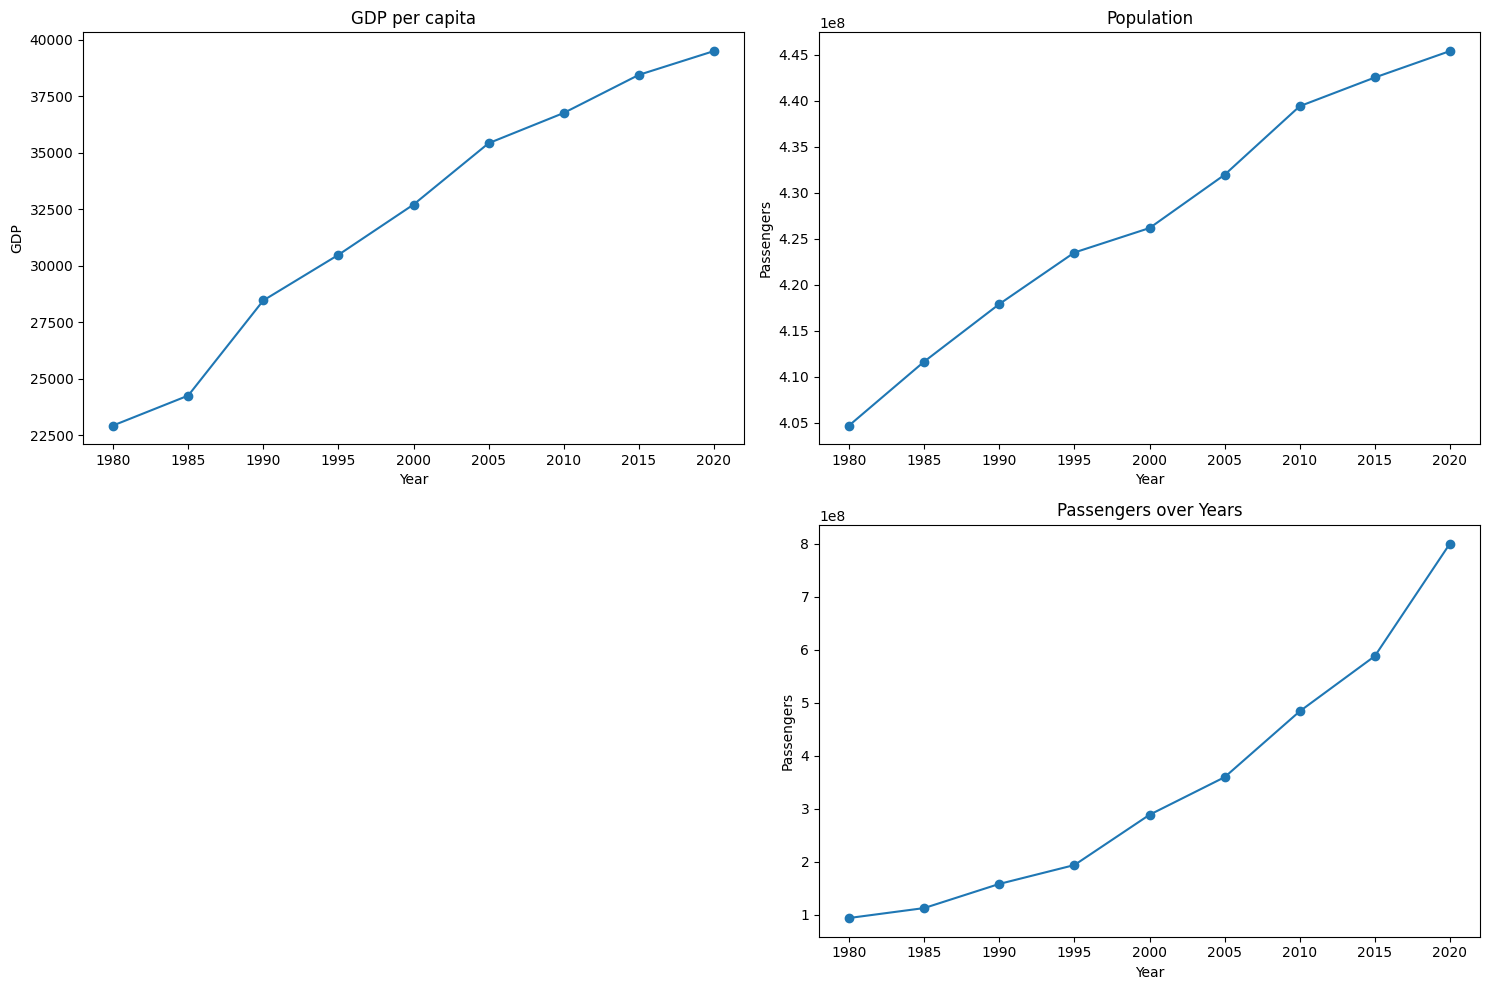

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(df['Year'], df['GDP'])
plt.plot(df['Year'], df['GDP'])
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP per capita')

plt.subplot(2, 2, 2)
plt.scatter(df['Year'], df['Population'])
plt.plot(df['Year'], df['Population'])
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Population')


plt.subplot(2, 2, 4)
plt.plot(df['Year'], df['Passengers'], label='Passengers')
plt.scatter(df['Year'], df['Passengers'], label='Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Passengers over Years')
plt.tight_layout()
plt.show()


## Training and testing

C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

   Year   Passengers       GDP  Population  Predicted_Passengers
0  2000  288449342.0  32703.95   426165414          2.557938e+08
1  2005  359471494.0  35416.87   431954554          3.839331e+08
2  2010  483874507.2  36754.22   439401634          5.261475e+08
3  2015  588104162.0  38438.10   442519104          6.363776e+08
4  2020  800581685.8  39491.19   445390196          7.287041e+08


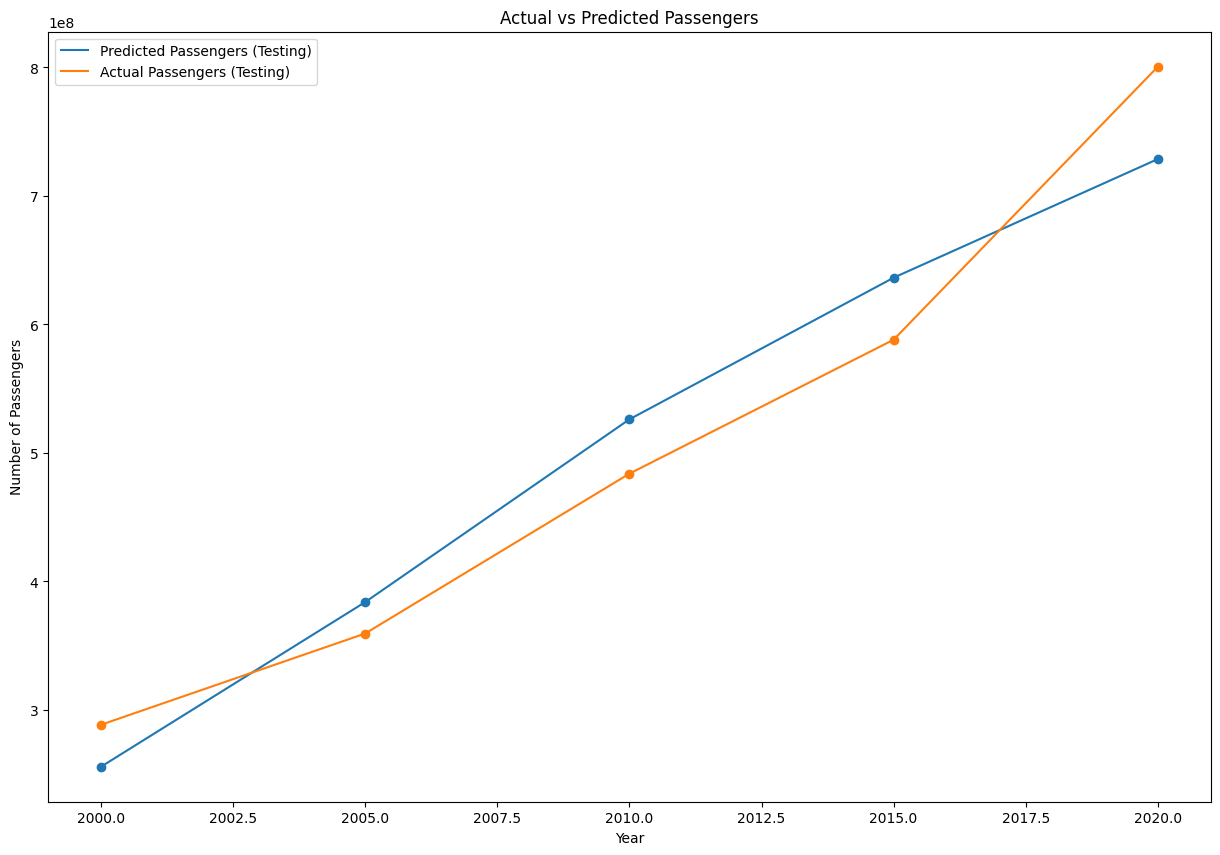

In [14]:
# Testing with data from 2010 to 2023
data_testing = {
    'Year': [2000, 2005, 2010, 2015, 2020],
    'Passengers': [288449342, 359471494, 483874507.2, 588104162, 800581685.8],
    'GDP': [32703.95, 35416.87, 36754.22, 38438.1, 39491.19], #changed
    'Population': [426165414, 431954554, 439401634, 442519104, 445390196] 
}
# try scaling the data - because values are too different
# have a better representation of the short term
# try a linear estimation for COVID
# read the papers/studies added in the chat
# looking at the emissions historically - before ETS and after ETS (look for a change)

data_testing_df = pd.DataFrame(data_testing)

# Initialize an empty list to store predicted passengers
predicted_passengers = []

for index, row in data_testing_df.iterrows():
    new_data = np.array([[row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP2_df
data_testing_df['Predicted_Passengers'] = predicted_passengers

# Print the table with predictions
print(data_testing_df)

plt.figure(figsize=(15, 10))
plt.plot(data_testing_df['Year'], data_testing_df['Predicted_Passengers'], label='Predicted Passengers (Testing)')
plt.scatter(data_testing_df['Year'], data_testing_df['Predicted_Passengers'])
plt.plot(data_testing_df['Year'], data_testing_df['Passengers'], label='Actual Passengers (Testing)')
plt.scatter(data_testing_df['Year'], data_testing_df['Passengers'])
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Actual vs Predicted Passengers')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(data_testing_df['Passengers'], data_testing_df['Predicted_Passengers'])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(data_testing_df['Passengers'], data_testing_df['Predicted_Passengers'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((data_testing_df['Passengers'] - data_testing_df['Predicted_Passengers']) / data_testing_df['Passengers'])) * 100

# Print the error metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 43908228.913101494
Mean Squared Error (MSE): 2189694203909206.0
Root Mean Squared Error (RMSE): 46794168.481865406
Mean Absolute Percentage Error (MAPE): 8.809755615833248%


## Forecast with SSP1

   Year          GDP  Population
0  2020  39491.19000   445390196
1  2025  44840.05762   446579076
2  2030  49000.87695   444838951
3  2035  53488.96710   443277038
4  2040  58473.59810   441988876
5  2045  63571.89217   441073752
6  2050  68415.10005   440268170
   Year          GDP  Population  Predicted_Passengers
0  2020  39491.19000   445390196          7.287041e+08
1  2025  44840.05762   446579076          1.019091e+09
2  2030  49000.87695   444838951          1.267720e+09
3  2035  53488.96710   443277038          1.613225e+09
4  2040  58473.59810   441988876          2.089613e+09
5  2045  63571.89217   441073752          2.674269e+09
6  2050  68415.10005   440268170          3.316209e+09


C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

Text(0.5, 1.0, 'Predicted Passengers SSP1')

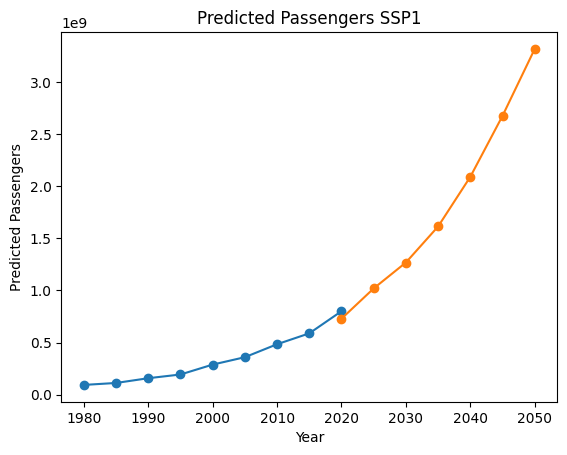

In [25]:

# SSP1 data (done)
SSP1_data = {
    'Year': [2020, 2025, 2030, 2035, 2040, 2045, 2050],
    'GDP': [39491.19, 44840.05762, 49000.87695, 53488.9671, 58473.5981, 63571.89217, 68415.10005],
    'Population': [445390196, 446579076, 444838951, 443277038, 441988876, 441073752, 440268170], 
 
}

# Create a DataFrame from SSP2 data
SSP1_df = pd.DataFrame(SSP1_data)
print(SSP1_df)
# Initialize an empty list to store predicted passengers
predicted_passengers = []

# Loop through each row in SSP2_df to predict passengers
for index, row in SSP1_df.iterrows():
    new_data = np.array([[row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP2_df
SSP1_df['Predicted_Passengers'] = predicted_passengers

# Ensure all predicted passengers are non-negative
SSP1_df['Predicted_Passengers'] = SSP1_df['Predicted_Passengers'].apply(lambda x: abs(x))

# Print the table with predictions
print(SSP1_df)


plt.plot(data['Year'], data['Passengers'])
plt.scatter(data['Year'], data['Passengers'])
plt.plot(SSP1_df['Year'], SSP1_df['Predicted_Passengers'])
plt.scatter(SSP1_df['Year'], SSP1_df['Predicted_Passengers'])
plt.xlabel('Year')
plt.ylabel('Predicted Passengers')
plt.title('Predicted Passengers SSP1')



## Forecast with SSP2

   Year          GDP  Population
0  2020  39491.19000   445390196
1  2025  44874.48025   446236511
2  2030  49037.24449   443854069
3  2035  53016.81044   441591352
4  2040  57004.19650   439684545
5  2045  60893.32538   438044333
6  2050  64686.67546   436605103
   Year          GDP  Population  Predicted_Passengers
0  2020  39491.19000   445390196          7.287041e+08
1  2025  44874.48025   446236511          1.015046e+09
2  2030  49037.24449   443854069          1.254966e+09
3  2035  53016.81044   441591352          1.547891e+09
4  2040  57004.19650   439684545          1.907474e+09
5  2045  60893.32538   438044333          2.318670e+09
6  2050  64686.67546   436605103          2.775767e+09


C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

Text(0.5, 1.0, 'Predicted Passengers SSP2')

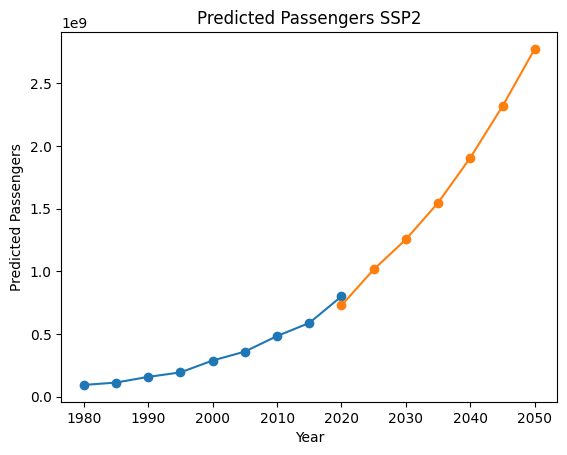

In [24]:

# SSP2 data (done)
SSP2_data = {
    'Year': [2020, 2025, 2030, 2035, 2040, 2045, 2050],
    'GDP': [39491.19, 44874.48025, 49037.24449, 53016.81044, 57004.1965, 60893.32538, 64686.67546],
    'Population': [445390196, 446236511, 443854069, 441591352, 439684545, 438044333, 436605103],
}

# Create a DataFrame from SSP2 data
SSP2_df = pd.DataFrame(SSP2_data)
print(SSP2_df)
# Initialize an empty list to store predicted passengers
predicted_passengers = []

# Loop through each row in SSP2_df to predict passengers
for index, row in SSP2_df.iterrows():
    new_data = np.array([[row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP2_df
SSP2_df['Predicted_Passengers'] = predicted_passengers

# Ensure all predicted passengers are non-negative
SSP2_df['Predicted_Passengers'] = SSP2_df['Predicted_Passengers'].apply(lambda x: abs(x))

# Print the table with predictions
print(SSP2_df)



plt.plot(data['Year'], data['Passengers'])
plt.scatter(data['Year'], data['Passengers'])
plt.plot(SSP2_df['Year'], SSP2_df['Predicted_Passengers'])
plt.scatter(SSP2_df['Year'], SSP2_df['Predicted_Passengers'])
plt.xlabel('Year')
plt.ylabel('Predicted Passengers')
plt.title('Predicted Passengers SSP2')

## Forecast with SSP3

   Year          GDP  Population  Predicted_Passengers
0  2020  39491.19000   445390196          7.287041e+08
1  2025  44972.19890   445266898          1.004030e+09
2  2030  49139.66803   441743088          1.231435e+09
3  2035  52255.56606   438461797          1.442109e+09
4  2040  54574.49250   435805436          1.625645e+09
5  2045  56230.53373   433175979          1.766510e+09
6  2050  57462.92679   430833859          1.878970e+09


C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

Text(0.5, 1.0, 'Predicted Passengers SSP3')

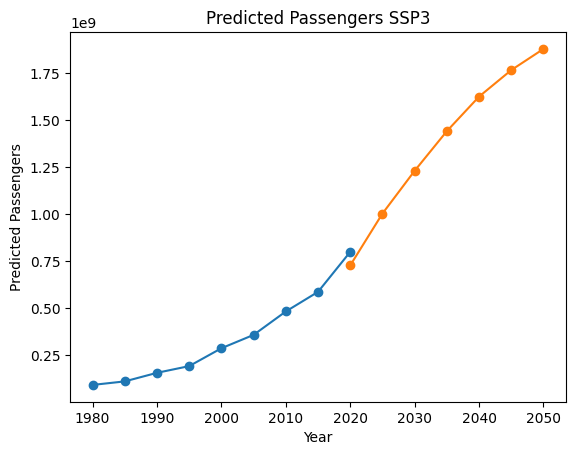

In [28]:
# SSP3 data
SSP3_data = {
    'Year': [2020, 2025, 2030, 2035, 2040, 2045, 2050],
    'GDP': [39491.19, 44972.1989, 49139.66803, 52255.56606, 54574.4925, 56230.53373, 57462.92679],
    'Population': [445390196, 445266898, 441743088, 438461797, 435805436, 433175979, 430833859],
}

# Create a DataFrame from SSP3 data
SSP3_df = pd.DataFrame(SSP3_data)
# Initialize an empty list to store predicted passengers
predicted_passengers = []

# Loop through each row in SSP3_df to predict passengers
for index, row in SSP3_df.iterrows():
    new_data = np.array([[row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP3_df
SSP3_df['Predicted_Passengers'] = predicted_passengers
SSP3_df['Predicted_Passengers'] = SSP3_df['Predicted_Passengers'].apply(lambda x: abs(x))

# Print the table with predictions
print(SSP3_df)


plt.plot(data['Year'], data['Passengers'])
plt.scatter(data['Year'], data['Passengers'])
plt.plot(SSP3_df['Year'], SSP3_df['Predicted_Passengers'])
plt.scatter(SSP3_df['Year'], SSP3_df['Predicted_Passengers'])
plt.xlabel('Year')
plt.ylabel('Predicted Passengers')
plt.title('Predicted Passengers SSP3')


## Forecast with SSP4

   Year          GDP  Population  Predicted_Passengers
0  2020  39491.19000   445390196          7.287041e+08
1  2025  44969.09708   445297611          1.004369e+09
2  2030  49396.63988   441145334          1.242597e+09
3  2035  54089.06359   436232468          1.583838e+09
4  2040  59081.91630   430677879          2.055351e+09
5  2045  63924.91522   425052595          2.623657e+09
6  2050  68317.62173   419214056          3.237704e+09


C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

Text(0.5, 1.0, 'Predicted Passengers SSP4')

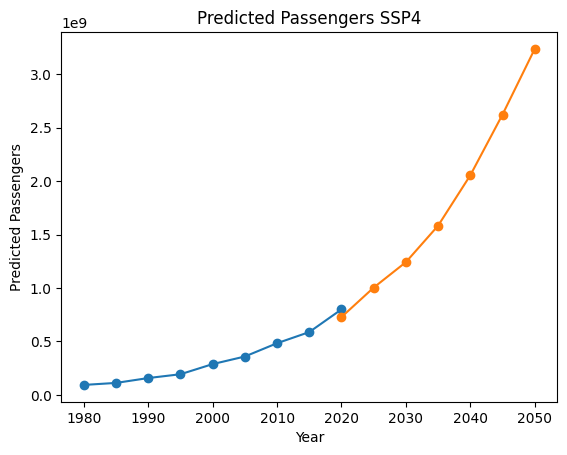

In [34]:
# SSP4 data
SSP4_data = {
    'Year': [2020, 2025, 2030, 2035, 2040, 2045, 2050],
    'GDP': [39491.19, 44969.09708, 49396.63988, 54089.06359, 59081.9163, 63924.91522, 68317.62173],
    'Population': [445390196, 445297611, 441145334, 436232468, 430677879, 425052595, 419214056]
}

# Create a DataFrame from SSP3 data
SSP4_df = pd.DataFrame(SSP4_data)
# Initialize an empty list to store predicted passengers
predicted_passengers = []

# Loop through each row in SSP4_df to predict passengers
for index, row in SSP4_df.iterrows():
    new_data = np.array([[row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP4_df
SSP4_df['Predicted_Passengers'] = predicted_passengers

SSP4_df['Predicted_Passengers'] = SSP4_df['Predicted_Passengers'].apply(lambda x: abs(x))


# Print the table with predictions
print(SSP4_df)



plt.plot(data['Year'], data['Passengers'])
plt.scatter(data['Year'], data['Passengers'])
plt.plot(SSP4_df['Year'], SSP4_df['Predicted_Passengers'])
plt.scatter(SSP4_df['Year'], SSP4_df['Predicted_Passengers'])
plt.xlabel('Year')
plt.ylabel('Predicted Passengers')
plt.title('Predicted Passengers SSP4')

## Forecast with SSP5

C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

Text(0.5, 1.0, 'Predicted Passengers SSP5')

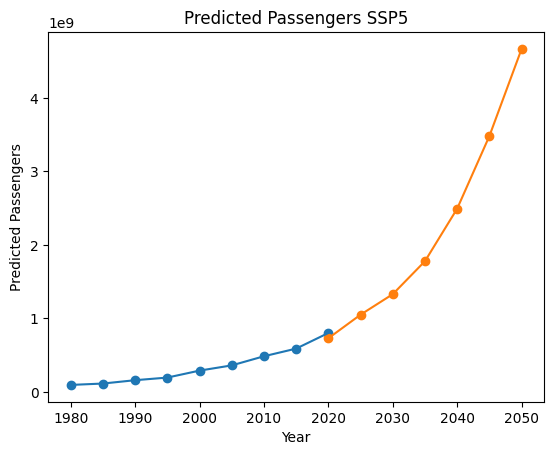

In [36]:

# SSP5 data (done)
SSP5_data = {
    'Year': [2020, 2025, 2030, 2035, 2040, 2045, 2050],
    'GDP': [39491.19, 44598.31534, 48544.87441, 53680.48236, 60305.60052, 67731.91226, 75163.35034],
    'Population': [445390196, 448999729, 450223165, 452169726, 454871872, 458363688, 462315387], #SSP5
}

# Create a DataFrame from SSP2 data
SSP5_df = pd.DataFrame(SSP5_data)

# Initialize an empty list to store predicted passengers
predicted_passengers = []

# Loop through each row in SSP2_df to predict passengers
for index, row in SSP5_df.iterrows():
    new_data = np.array([[row['GDP'], row['Population']]])
    new_data_poly = poly.transform(new_data)
    predicted_price = model.predict(new_data_poly)
    predicted_passengers.append(predicted_price[0])

# Add the predicted passengers to the SSP2_df
SSP5_df['Predicted_Passengers'] = predicted_passengers

# Ensure all predicted passengers are non-negative
SSP5_df['Predicted_Passengers'] = SSP5_df['Predicted_Passengers'].apply(lambda x: abs(x))



plt.plot(data['Year'], data['Passengers'])
plt.scatter(data['Year'], data['Passengers'])
plt.plot(SSP5_df['Year'], SSP5_df['Predicted_Passengers'])
plt.scatter(SSP5_df['Year'], SSP5_df['Predicted_Passengers'])
plt.xlabel('Year')
plt.ylabel('Predicted Passengers')
plt.title('Predicted Passengers SSP5')

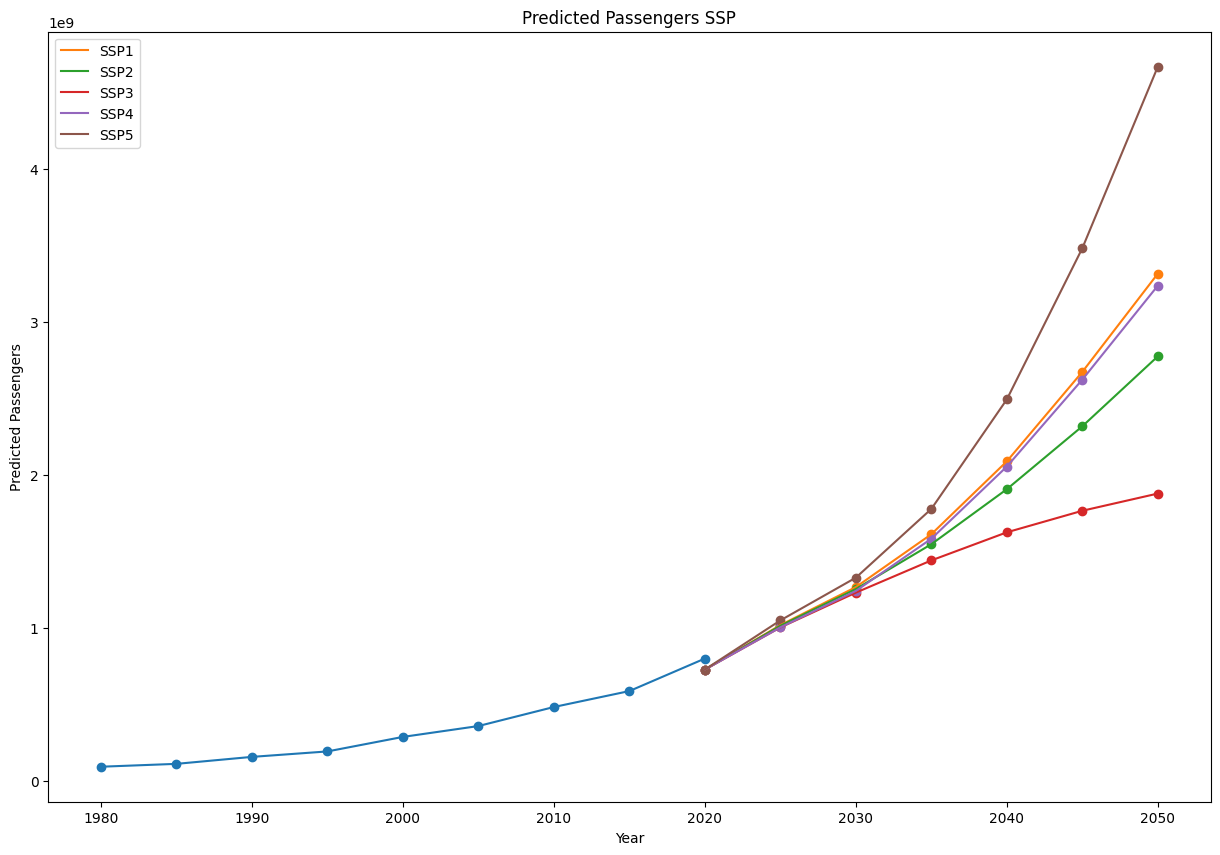

In [40]:
plt.figure(figsize=(15, 10))
plt.plot(data['Year'], data['Passengers'])
plt.scatter(data['Year'], data['Passengers'])
plt.plot(SSP1_df['Year'], SSP1_df['Predicted_Passengers'], label='SSP1')
plt.scatter(SSP1_df['Year'], SSP1_df['Predicted_Passengers'])
plt.plot(SSP2_df['Year'], SSP2_df['Predicted_Passengers'], label='SSP2')
plt.scatter(SSP2_df['Year'], SSP2_df['Predicted_Passengers'])
plt.plot(SSP3_df['Year'], SSP3_df['Predicted_Passengers'], label='SSP3')
plt.scatter(SSP3_df['Year'], SSP3_df['Predicted_Passengers'])
plt.plot(SSP4_df['Year'], SSP4_df['Predicted_Passengers'], label='SSP4')
plt.scatter(SSP4_df['Year'], SSP4_df['Predicted_Passengers'])
plt.plot(SSP5_df['Year'], SSP5_df['Predicted_Passengers'], label='SSP5')
plt.scatter(SSP5_df['Year'], SSP5_df['Predicted_Passengers'])
plt.xlabel('Year')
plt.ylabel('Predicted Passengers')
plt.title('Predicted Passengers SSP')
plt.legend()
plt.show()